In [143]:
from __future__ import division

from models import *
from utils.utils import *
from utils.datasets import *
from utils.augmentations import *
from utils.transforms import *

import os
import sys
import time
import datetime
import argparse

from PIL import Image

import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator

In [144]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [145]:
model = Darknet("config/yolov3-custom.cfg", img_size=416)
model2 = Darknet("config/yolov3-custom2.cfg", img_size=416)

In [146]:
model.load_state_dict(torch.load("checkpoints_goodmodel/yolov3_ckpt_70.pth"))
model2.load_state_dict(torch.load("checkpoints/yolov3_ckpt_99.pth"))

<All keys matched successfully>

In [147]:
model.eval()
model2.eval()

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_1): LeakyReLU(negative_slope=0.1)
    )
    (2): Sequential(
      (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_3): BatchNorm2d(64, eps=1e-05, momen

In [148]:
classes = load_classes("data/custom/classes.names")
classes

['license_plate']

In [149]:
classes2 = load_classes("data/custom2/classes.names")
classes2

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'ga',
 'na',
 'da',
 'ra',
 'ma',
 'ba',
 'sa',
 'a',
 'ja',
 'geo',
 'neo',
 'deo',
 'reo',
 'meo',
 'beo',
 'seo',
 'eo',
 'jeo',
 'go',
 'no',
 'do',
 'ro',
 'mo',
 'bo',
 'so',
 'o',
 'jo',
 'gu',
 'nu',
 'du',
 'ru',
 'mu',
 'bu',
 'su',
 'u',
 'ju',
 'ha',
 'heo',
 'ho']

In [150]:
Tensor = torch.FloatTensor

In [151]:
src = "1.jpg"
img = np.array(Image.open(src).convert('RGB'), dtype=np.uint8)
boxes = np.zeros((1,5))
trans = transforms.Compose([DEFAULT_TRANSFORMS, Resize(416)])

img, _ = trans((img,boxes))
img = img.unsqueeze(0)
print(img.shape)

torch.Size([1, 3, 416, 416])


In [152]:
input_imgs = Variable(img.type(Tensor))

In [153]:
with torch.no_grad():
    detections = model(input_imgs)
    detections = non_max_suppression(detections, 0.8, 0.4)[0]

In [154]:
detections

tensor([[174.5164, 178.6299, 225.6640, 194.7134,   0.9998,   1.0000,   0.0000]])

In [155]:
cmap = plt.get_cmap("tab20b")
colors = [cmap(i) for i in np.linspace(0, 1, 20)]

(1080, 1920, 3)


<Figure size 432x288 with 0 Axes>

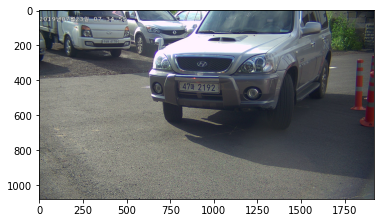

In [156]:
image = np.array(Image.open(src))
#image = cv2.resize(image, dsize=(416, 416), interpolation=cv2.INTER_LINEAR)
plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(image)
print(image.shape)

805 404 1041 478


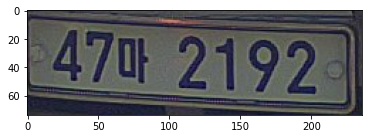

47ma2192


In [158]:
with torch.no_grad():
    detections = model(input_imgs)
    detections = non_max_suppression(detections, 0.8, 0.4)[0]
    
image = np.array(Image.open(src))
detections = rescale_boxes(detections, 416, image.shape[:2])
for x1, y1, x2, y2, conf, cls_conf, cls_pred in detections:
    x1 = int(x1)
    x2 = int(x2)
    y1 = int(y1)
    y2 = int(y2)
    print(x1, y1, x2, y2)
    img2 = image[y1:y2,x1:x2]
    plt.imshow(img2)
    plt.show()
    img2 = Image.fromarray(img2)
    img2 = np.array(img2.convert('RGB'), dtype=np.uint8)
    boxes = np.zeros((1,5))
    trans = transforms.Compose([DEFAULT_TRANSFORMS, Resize(416)])
    img2, _ = trans((img2,boxes))
    img2 = img2.unsqueeze(0)
    input_imgs2 = Variable(img2.type(Tensor))
    with torch.no_grad():
        detections2 = model2(input_imgs2)
        detections2 = non_max_suppression(detections2, 0.8, 0.4)[0]
        new_lst = []
        for i in detections2:
            if (i[5] > 0.8):
                new_lst.append([float(i[0]),float(i[1]),float(i[2]),float(i[3]),float(i[4]),float(i[5]),int(i[6])])
        new_lst = sorted(new_lst, key=lambda x: (x[0],x[1]))
        final_str = ""
        for i in new_lst:
            final_str += classes2[i[6]]
        print(final_str)
        